### Импортируем необходимые для работы библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузим наш датафрейм из файла .csv

In [2]:
df = pd.read_csv('kc-house-data.csv', sep = ',')
pd.set_option('display.max_columns', 21)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Описание данных
Набор данных содержит информацию о продаже домов в округе Кинг штат Вашингтон, США. В него входят дома, проданные в период с мая 2014 по май 2015 года.

#### Описание столбцов

id - Уникальный ID для каждого дома

date - Дата продажи дома

price - Стоимость продажи дома

bedrooms - Кол-во спален

bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)

sqft_living - Кв. футы жилые

sqft_lot - Кв. футы общие

floors - Кол-во этажей 

waterfront - Есть набержная или нет

view - Значение от 0 до 4 насколько хороший вид (включает виды на гору Дэниэль, Си, Каскадный хребет, горизонт Сиэтла, Пьюджет-Саунд, озеро Вашингтон, озеро Саммамиш, маленькие озера, реки, ручьи и т.д.)

condition - Значение от 1 до 5 насколько хорошее состояние

grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 3-6 конструкция здания и дизайн ниже среднего, 7-10 хорошая конструкция и дизайн, 11-13 - высокое качество конструкции и дизайна

sqft_above - Кв. футы дома, которые находятся выше земли

sqft_basement - Кв. футы дома, которые находятся ниже земли

yr_built - Год постройки дома

yr_renovated - Год ремонта дома

zipcode - Индекс

lat - Широтма

long - Долгота

sqft_living15 - Кв. футы жилой площади у 15 соседей

sqft_lot15 - Кв. футы общей площади у 15 соседей

### Ознакомимся с представленными данными

In [3]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df.iloc [: , 1:].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
mean,540088.1,3.4,2.1,2079.9,15107.0,1.5,0.0,0.2,3.4,7.7,1788.4,291.5,1971.0,84.4,98077.9,47.6,-122.2,1986.6,12768.5
std,367127.2,0.9,0.8,918.4,41420.5,0.5,0.1,0.8,0.7,1.2,828.1,442.6,29.4,401.7,53.5,0.1,0.1,685.4,27304.2
min,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0
25%,321950.0,3.0,1.8,1427.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.5,-122.3,1490.0,5100.0
50%,450000.0,3.0,2.2,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7620.0
75%,645000.0,4.0,2.5,2550.0,10688.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,47.7,-122.1,2360.0,10083.0
max,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.8,-121.3,6210.0,871200.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Пропущенных значений нет.

### Предварительый анализ и визуализация данных

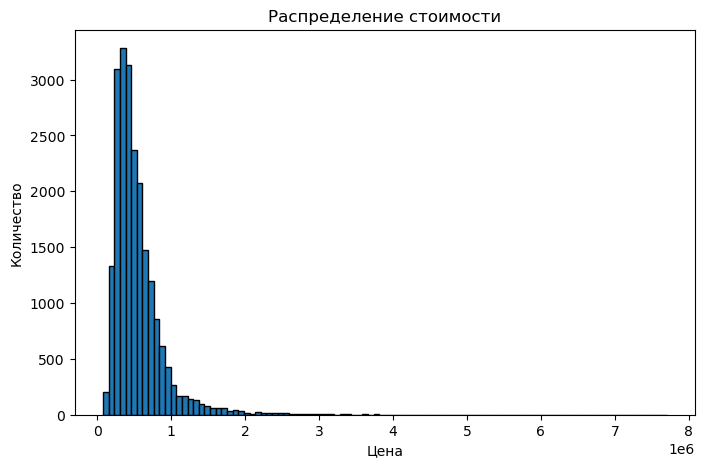

In [5]:
plt.figure(figsize = (8, 5))
plt.hist(df['price'], edgecolor = 'black', bins = 100)
plt.title('Распределение стоимости')
plt.xlabel('Цена')
plt.ylabel('Количество');

#### Посмотрим на самые дорогие и самые дешёвые дома

In [6]:
df[df["price"] > 3500000].sort_values(by = "price", ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6,-122.3,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.5,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6,-122.2,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.8,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6,-122.2,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.8,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6,-122.2,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.0,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6,-122.2,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.0,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.6,-122.2,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.2,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.7,-122.2,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.8,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.6,-122.2,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.5,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7,-122.3,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.0,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6,-122.2,3720,14592


In [7]:
df[df["price"] < 100000].sort_values(by = "price", ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5303,5128000010,20150105T000000,99000.0,2,1.0,960,8236,1.0,0,0,2,6,960,0,1948,0,98058,47.5,-122.2,1260,8236
5723,1788800630,20141029T000000,96500.0,3,1.0,840,12091,1.0,0,0,3,6,840,0,1959,0,98023,47.3,-122.3,840,9324
3321,2724200705,20141212T000000,95000.0,2,1.0,800,8550,1.0,0,0,3,7,800,0,1947,0,98198,47.4,-122.3,1490,8550
3805,7335400215,20150505T000000,95000.0,1,0.8,760,5746,1.0,0,0,4,5,760,0,1915,0,98002,47.3,-122.2,970,6696
14581,6929602721,20150408T000000,95000.0,2,1.0,960,7000,1.0,0,0,3,4,960,0,1918,0,98198,47.4,-122.3,1850,8120
10585,6198400218,20140919T000000,95000.0,2,1.0,1070,20450,1.0,0,0,2,6,1070,0,1948,0,98058,47.4,-122.2,1360,15581
10770,795000765,20140616T000000,92000.0,2,1.0,760,5500,1.5,0,0,3,5,760,0,1947,0,98168,47.5,-122.3,1040,5515
18939,4239400300,20141129T000000,90000.0,3,1.0,980,2490,2.0,0,0,4,6,980,0,1969,0,98092,47.3,-122.2,980,3154
17580,1423049019,20140523T000000,90000.0,2,1.0,580,7500,1.0,0,0,3,5,580,0,1943,0,98178,47.5,-122.3,1700,11250
7992,2734100835,20150303T000000,90000.0,1,1.0,780,4000,1.0,0,0,3,5,780,0,1905,0,98108,47.5,-122.3,1150,4000


Можно увидеть, что у дешёвых домов: 
- хуже оценка вида (view)
- хуже оценка (grade)
- нет набережной

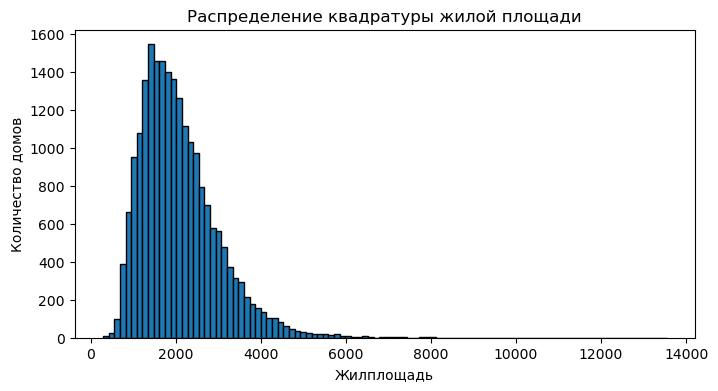

In [8]:
plt.figure(figsize = (8, 4))
plt.hist(df['sqft_living'], edgecolor = 'black',bins = 100)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Жилплощадь')
plt.ylabel('Количество домов');

#### Проверим есть ли ошибки в данных по домам с жилплощадью более 8000 ф.кв.

In [9]:
df[df["sqft_living"] > 8000].sort_values(by = "sqft_living", ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.7,-122.0,4850,217800
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6,-122.3,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.5,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6,-122.2,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.8,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6,-122.2,4540,42730
8092,1924059029,20140617T000000,4668000.0,5,6.8,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.6,-122.2,3270,10454
4411,2470100110,20140804T000000,5570000.0,5,5.8,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6,-122.2,3560,24345
14556,2303900035,20140611T000000,2888000.0,5,6.2,8670,64033,2.0,0,4,3,13,6120,2550,1965,2003,98177,47.7,-122.4,4140,81021
18302,6072800246,20140702T000000,3300000.0,5,6.2,8020,21738,2.0,0,0,3,11,8020,0,2001,0,98006,47.6,-122.2,4160,18969
1164,1247600105,20141020T000000,5110800.0,5,5.2,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.7,-122.2,3430,26788


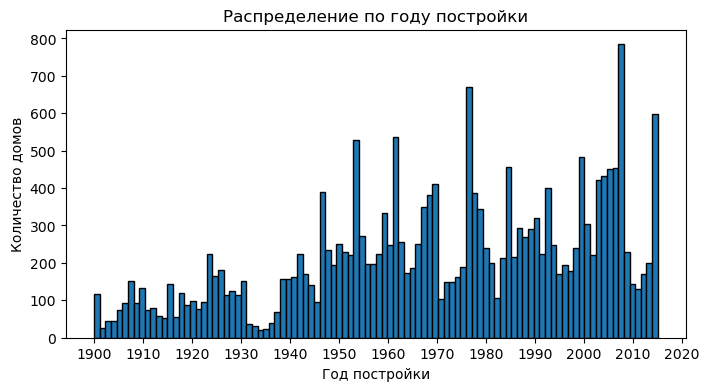

In [10]:
plt.figure(figsize = (8, 4))
plt.hist(df['yr_built'], bins = 100, edgecolor = 'black')
plt.title('Распределение по году постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов');
plt.locator_params (axis = 'x', nbins = 20)

Из графика можно увидеть, что строительство домов прямо связано с экономической ситуацией в стране. Спад строительства наблюдается во времена великой депрессии, во времена второй мировой, после глобального финансового кризиса в 2008 году.

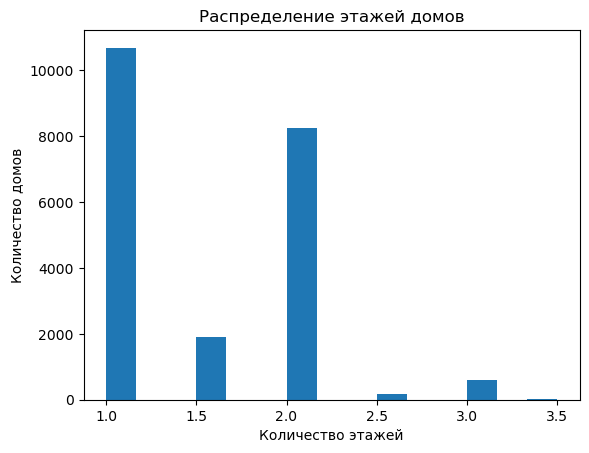

In [11]:
plt.hist(df['floors'], bins = 15)
# sns.countplot(df['floors']);
plt.title('Распределение этажей домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов');

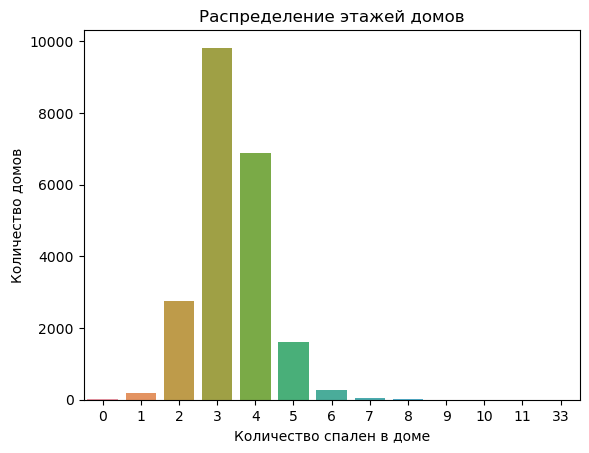

In [12]:
sns.countplot(data = df, x = 'bedrooms')
plt.title('Распределение этажей домов')
plt.xlabel('Количество спален в доме')
plt.ylabel('Количество домов');

#### Проверим дом c 33 спальнями

In [13]:
df[df["bedrooms"] == 33] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.8,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.7,-122.3,1330,4700


При общей жилой площади в 1620 кв. ф. в доме 33 спальни. Скорее всего, данные были введены не правильно.

In [14]:
df = df[df['bedrooms'] != 33]

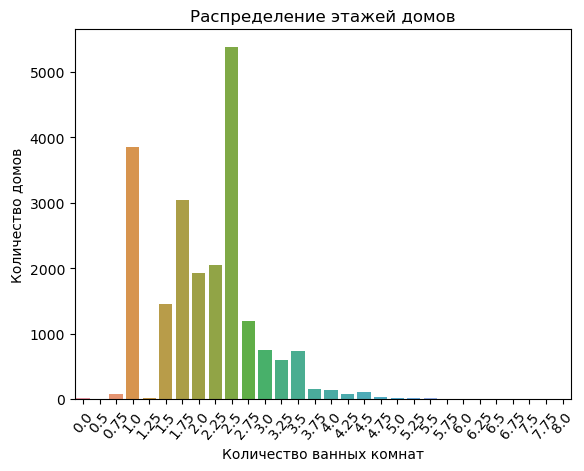

In [15]:
sns.countplot(data = df, x = 'bathrooms')
plt.xticks(rotation = 50);
plt.title('Распределение этажей домов')
plt.xlabel('Количество ванных комнат')
plt.ylabel('Количество домов');

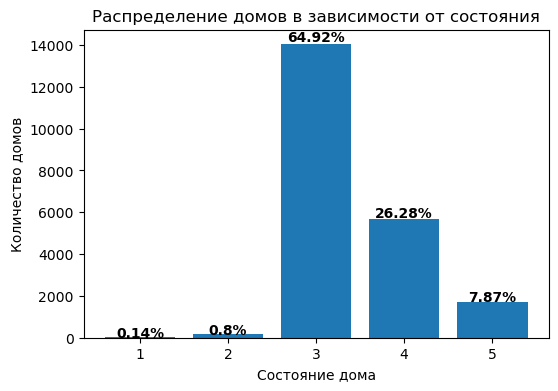

In [16]:
all_home = df["condition"].value_counts().sum()
data = df["condition"].value_counts()
percentage = []
for i in range(data.shape[0]):
    pct = (data.values[i] / all_home) * 100
    percentage.append(round(pct,2))
plt.figure(figsize = (6,4))
graph = plt.bar(data.index,data.values)
plt.title('Распределение домов в зависимости от состояния')
plt.xlabel('Состояние дома')
plt.ylabel('Количество домов');
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x + width / 2,
             y + height * 1.01,
             str(percentage[i]) + '%',
             ha = 'center',
             weight = 'bold')
    i += 1
plt.show()

Состояние домов довольно хорошее. Большинство домов имеют оценку от 3 до 5.

0    21449
1      163
Name: waterfront, dtype: int64


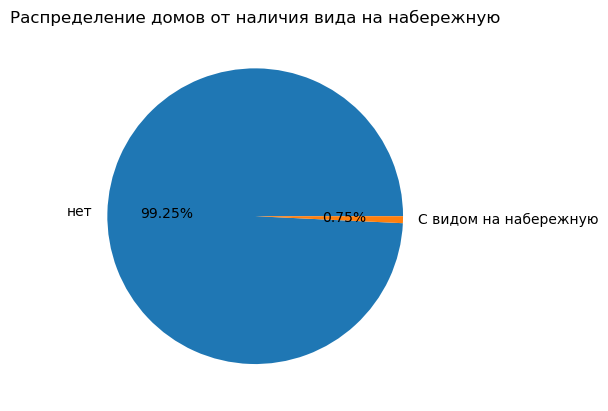

In [17]:
plt.pie(df['waterfront'].value_counts(), labels=["нет", "С видом на набережную"], autopct='%.2f%%')
plt.title('Распределение домов от наличия вида на набережную')
print(df['waterfront'].value_counts())

### Посмотрим на дату продажи домов

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

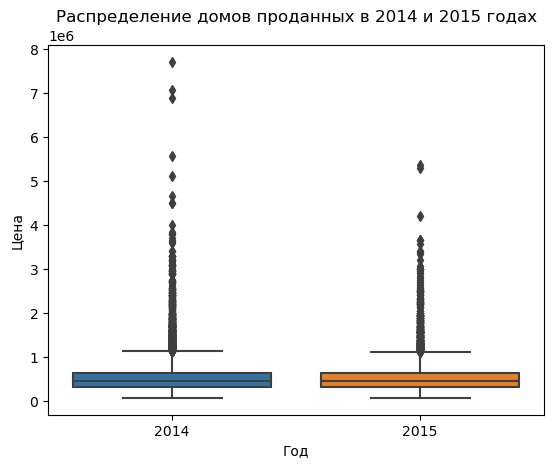

In [20]:
sns.boxplot(x = df['date'].dt.year, y = df['price']);
plt.title('Распределение домов проданных в 2014 и 2015 годах')
plt.xlabel('Год')
plt.ylabel('Цена');

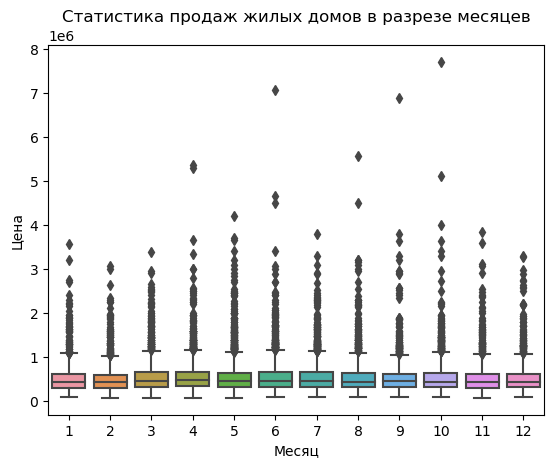

In [21]:
sns.boxplot(x = df['date'].dt.month, y = df['price']);
plt.title('Статистика продаж жилых домов в разрезе месяцев')
plt.xlabel('Месяц')
plt.ylabel('Цена');

### Изучим, в каких городах находится самая дорогая недвижимость

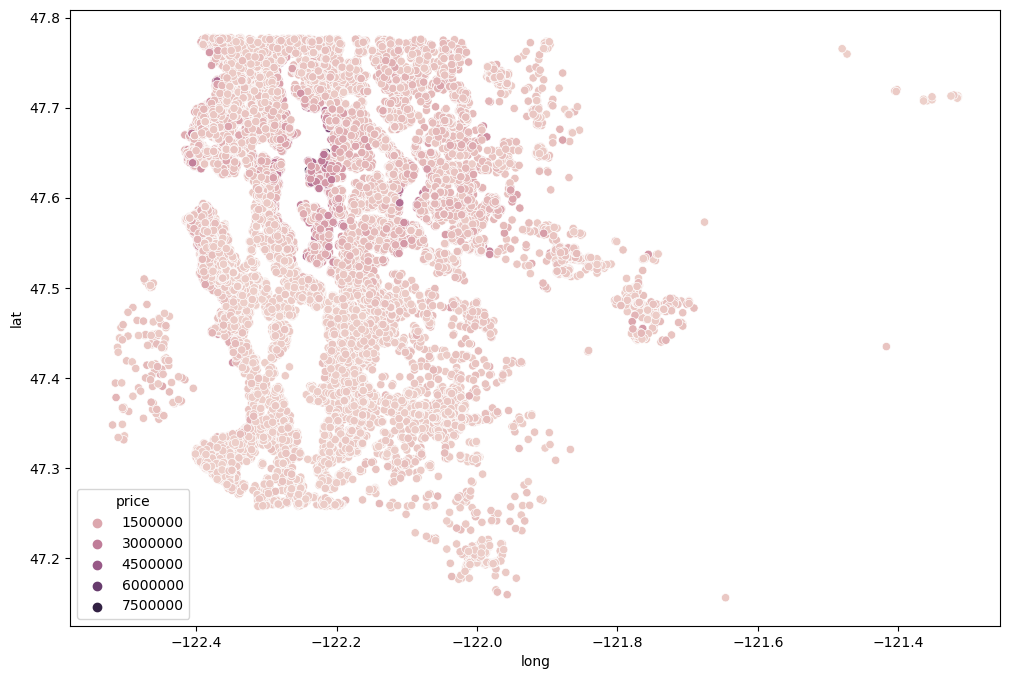

In [23]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price');

Большая часть дорогостоющей недвижимости сконцентрировано в городах Медина, Мерсер-Айленд, Бельвью.

### Для поиска линейных зависимостей стоимости недвижимости и ее характеристик построим тепловую карту корреляции

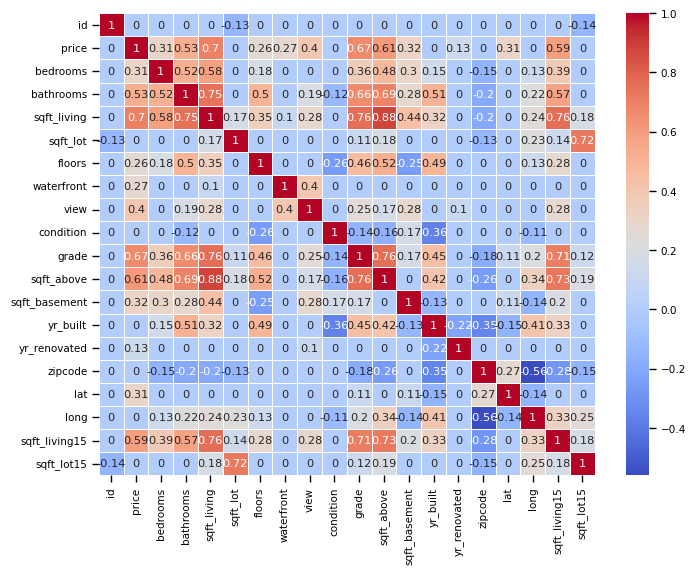

In [24]:
corr_matrix = df.corr(numeric_only = True)
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0
sns.set_context("paper", font_scale = 0.85)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

Тепловая карта указывает на корреляцию между ценой и следующими параметрами:
- жилая площадь
- оценка дома (grade)
- оценка вида (view)
- наличие набережной (waterfront)
- площадь без подвала (можно не рассматривать, поскольку площадь без подвала является производной жилой площади) 
- площадь подвала (можно не рассматривать, поскольку площадь подвала является производной жилой площади) 
- жилая площадь 15 ближайших соседей (можно не рассматривать, поскольку жилая площадь 15 ближайших соседей взаимосвязвна с жилой площадью и не влияет на цену)
- кол-во спален (Чем больше дом тем больше в нем спален и его цена. Поэтому при определении цены на жилье следует учитывать только размер жилой площади, так как кол-во спален сильно коррелирует с ней)
- кол-во ванных комнат (при определении цены на жилье следует учитывать только размер жилой площади, так как кол-во ванных комнат сильно коррелирует с ней)
- кол-во этажей (при определении цены на жилье следует учитывать только размер жилой площади, так как кол-во этажей сильно коррелирует с ней)

### Рассмотрим подробнее какие параметры влияют на стоимость недвижимости

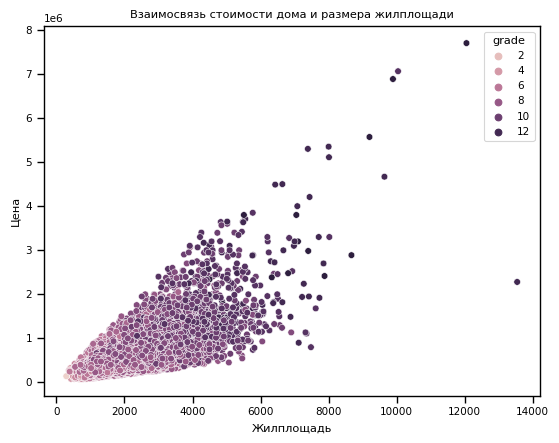

In [25]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = df, hue = "grade")
plt.xlabel('Жилплощадь')
plt.ylabel('Цена')
plt.title('Взаимосвязь стоимости дома и размера жилплощади');

Чем больше жилплощадь, тем выше стоимость дома и разброс цены.

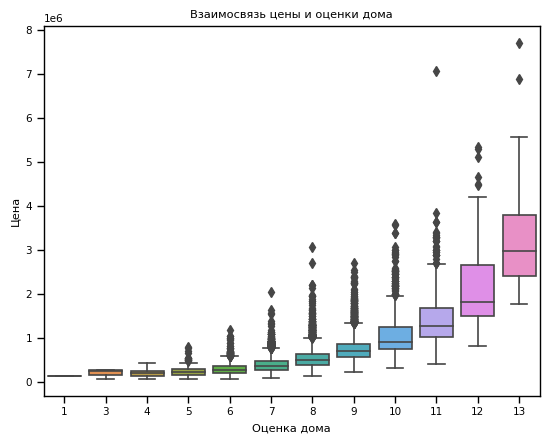

In [26]:
sns.boxplot(x = 'grade', y = 'price', data = df)
plt.xlabel('Оценка дома')
plt.ylabel('Цена')
plt.title('Взаимосвязь цены и оценки дома');

Чем выше оценка дома, тем выше его стоимость и разброс цены.

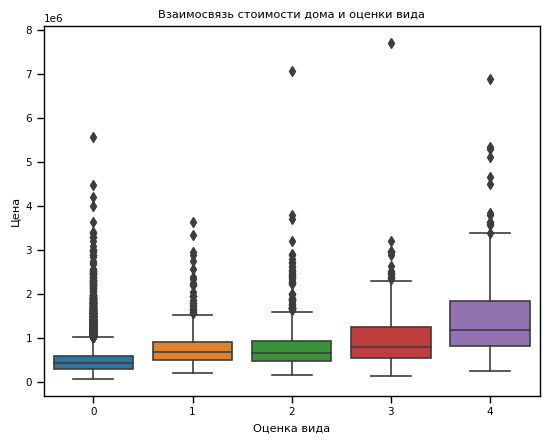

In [27]:
sns.boxplot(x = 'view', y ='price', data = df)
plt.xlabel('Оценка вида')
plt.ylabel('Цена')
plt.title('Взаимосвязь стоимости дома и оценки вида');

Чем выше оценка вида, тем выше стоимость дома. Для домов с оценкой 1 и 2 стоимость практически одинакова.

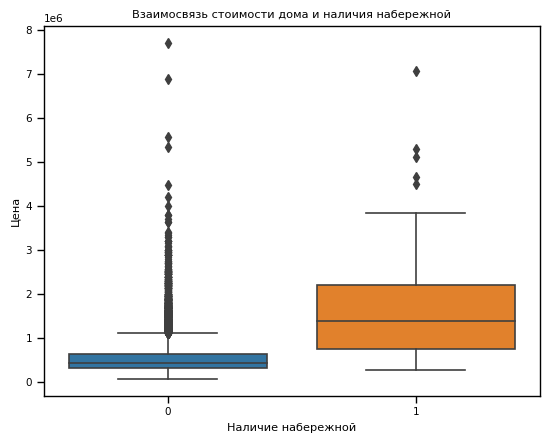

In [28]:
sns.boxplot(x = 'waterfront', y = 'price', data = df)
plt.xlabel('Наличие набережной')
plt.ylabel('Цена')
plt.title('Взаимосвязь стоимости дома и наличия набережной');

В среднем дома с набережной стоят дороже.

#### Построим таблицу с подсчетом количества домов в зависимости от вида на набережную и оценкой вида

In [29]:
df.pivot_table(index = 'view',
               columns = 'waterfront',
               aggfunc = 'count',
               values = 'price')

waterfront,0,1
view,,
0,19489.0,NaN
1,331.0,1.0
2,955.0,8.0
3,491.0,19.0
4,184.0,135.0


135 домов с набережной, а это 83 % от всех домов имеют оценку вида 4. 

В завершение могу сказать, что при определении цены на жилье агентство недвижимости должно учитывать площадь жилого помещения и оценку дома (grade). Кроме того, на стоимость дома положительное воздействие оказывают такие факторы, как оценка вида (view) и наличие прилегающей набережной (waterfront).